# Data-Preprocessign-01
# Measures of Central Tendency --> Mean, Median

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read CSV file

In [3]:
df = pd.read_csv('train.csv')
b_df = df.copy()

# Some info about data

In [106]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df.isnull().sum().sum()

7829

# Separate numerical data and Object data

In [53]:
df_num = df.select_dtypes(include = ['int64','float64'])
df_cat = df.select_dtypes(include = ['object'])

In [54]:
df_num_list = df_num.columns.to_list()
df_num_list.pop(0)

df_cat_list = df_cat.columns.to_list()

df_num_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

0

# See Visualization of missing data

<Axes: >

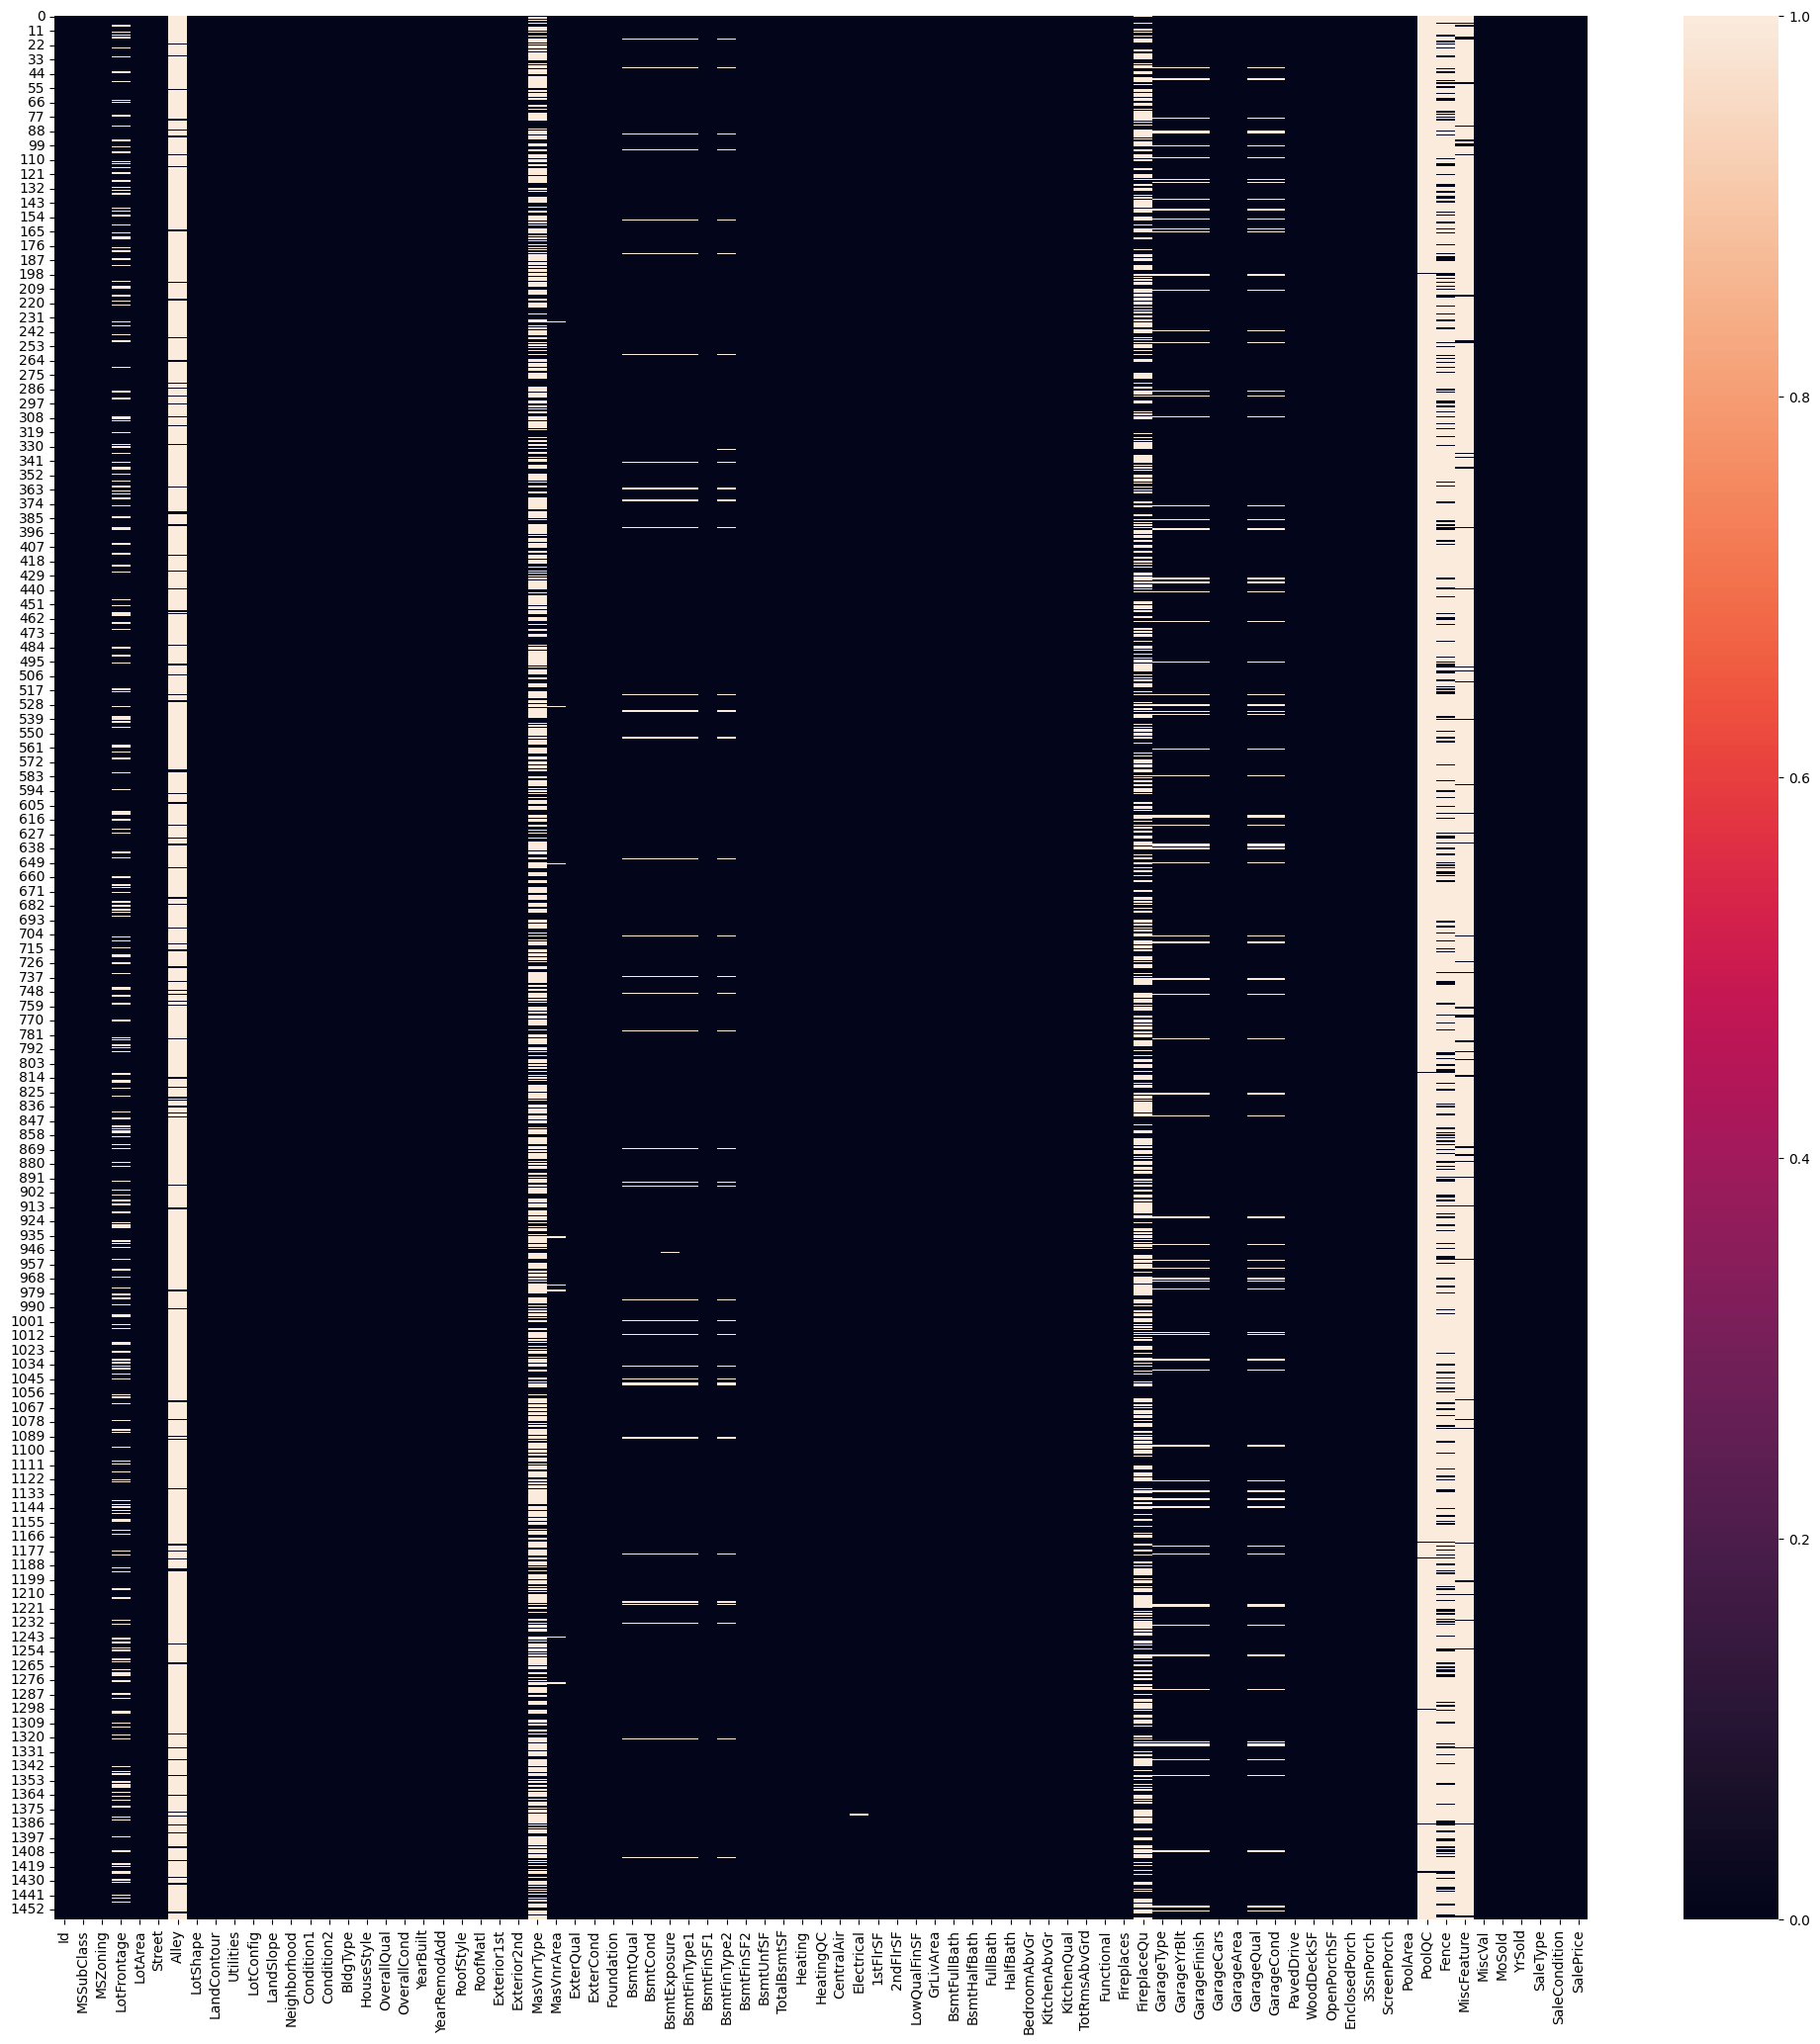

In [29]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

# Get Percentage of all columns

In [66]:
data_percen = df.isnull().sum()/df.shape[0]*100
data_percen

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


#Get column who has more than 20% missing values

In [64]:
data_percen > 20

,0
Id,False
MSSubClass,False
MSZoning,False
LotFrontage,False
LotArea,False
...,...
MoSold,False
YrSold,False
SaleType,False
SaleCondition,False


In [67]:
miss_col_20 = data_percen[data_percen>20]
miss_col_20.keys()

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

# Drop These column

In [68]:
drop_col = df.drop(miss_col_20.keys(), axis=1)
drop_col.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [69]:
print(f'Original Shape: {df.shape}')
print(f'Clean Shape: {drop_col.shape}')

Original Shape: (1460, 81)
Clean Shape: (1460, 75)


<Axes: >

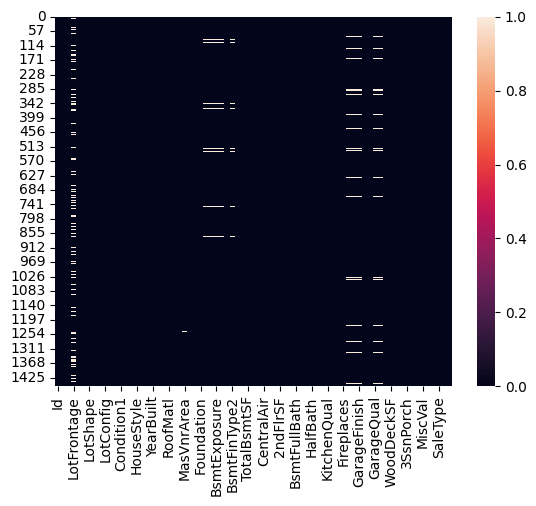

In [70]:
sns.heatmap(drop_col.isnull())

In [71]:
drop_col.isnull().sum().sum()

860

In [72]:
num_col = drop_col.select_dtypes(include = ['int64','float64'])
num_col.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Fill Rows with Different data

In [73]:
df_num.isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,259
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,8
BsmtFinSF1,0


# See columns that contain null value

In [142]:
df_num.columns[df_num.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [74]:
columns_with_null = df_num.columns[df_num.isnull().any()].tolist()
columns_with_null

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Null value Visulization with Distplot

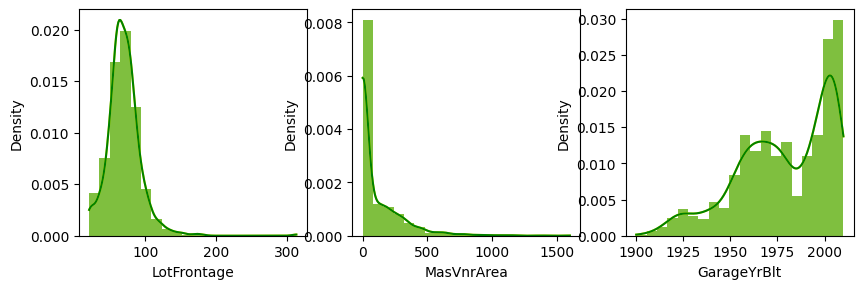

In [86]:
plt.figure(figsize=(10,10))

for i, col in enumerate(columns_with_null):

  plt.subplot(3, 3, i+1)  #subplot(m*n, ith)
  sns.histplot(df[col], color='yellow', bins=20, label="100% Equities", kde=True, stat="density", linewidth=0)
  sns.histplot(drop_col[col], color='green', bins=20, label="100% Equities", kde=True, stat="density", linewidth=0)

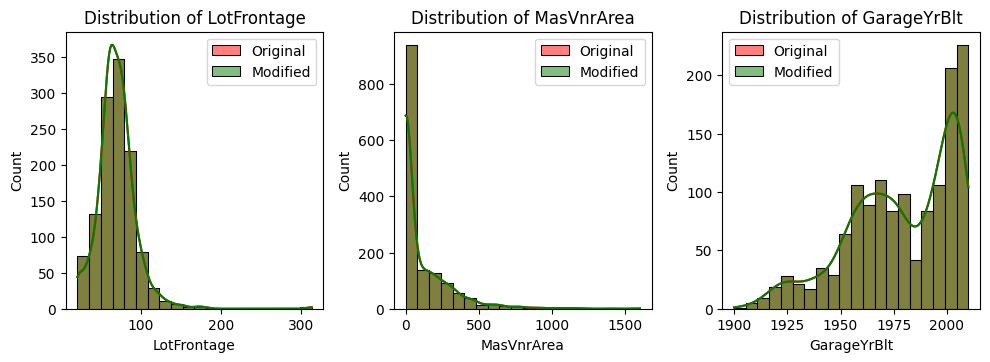

In [88]:
plt.figure(figsize=(10, 10))

# Loop through each column with null values
for i, col in enumerate(columns_with_null):
    plt.subplot(3, 3, i+1)  # Create subplot in a 3x3 grid
    sns.histplot(df[col], color='red', bins=20, kde=True, label='Original')  # Red distribution
    sns.histplot(drop_col[col], color='green', bins=20, kde=True, label='Modified')  # Green distribution
    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()

In [59]:
drop_col.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

# Fill with Mean

In [99]:
# Mean find of each null value column

mn = df_num[columns_with_null].mean()
mn

,0
LotFrontage,70.049958
MasVnrArea,103.685262
GarageYrBlt,1978.506164


In [98]:
df_fill_mean = df_num.fillna(mn)
df_fill_mean.isnull().sum().sum()

0

<Axes: >

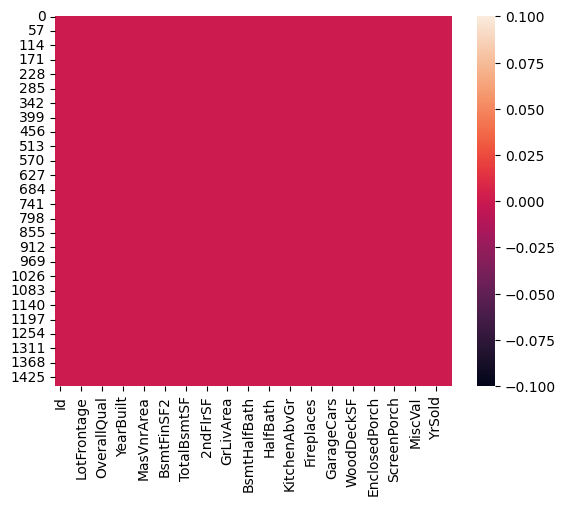

In [143]:
sns.heatmap(df_fill_mean.isnull())

# Concat Original and Mean data

In [107]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [109]:
mean_concat = pd.concat(
    [df_num[columns_with_null], df_fill_mean[columns_with_null]],
    axis=1,
    keys=['Org_Data', 'Mean_Data']
)
mean_concat.head(10)

Org_Data                          Mean_Data                       
  LotFrontage MasVnrArea GarageYrBlt LotFrontage MasVnrArea GarageYrBlt
0        65.0      196.0      2003.0   65.000000      196.0      2003.0
1        80.0        0.0      1976.0   80.000000        0.0      1976.0
2        68.0      162.0      2001.0   68.000000      162.0      2001.0
3        60.0        0.0      1998.0   60.000000        0.0      1998.0
4        84.0      350.0      2000.0   84.000000      350.0      2000.0
5        85.0        0.0      1993.0   85.000000        0.0      1993.0
6        75.0      186.0      2004.0   75.000000      186.0      2004.0
7         NaN      240.0      1973.0   70.049958      240.0      1973.0
8        51.0        0.0      1931.0   51.000000        0.0      1931.0
9        50.0        0.0      1939.0   50.000000        0.0      1939.0

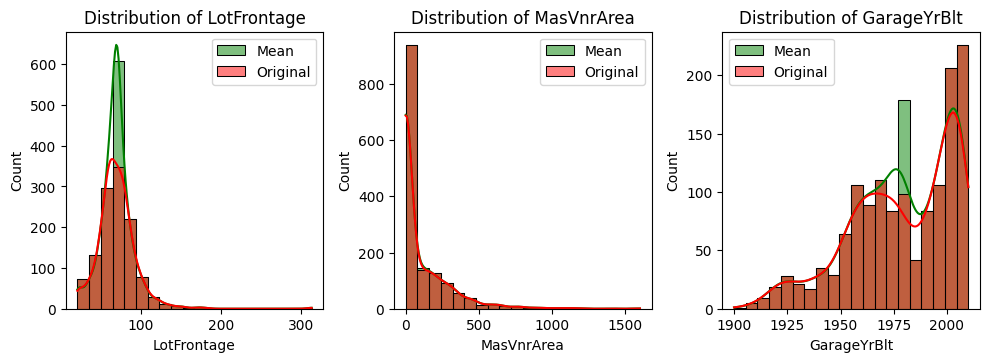

In [112]:
plt.figure(figsize=(10, 10))

# Loop through each column with null values
for i, col in enumerate(columns_with_null):
    plt.subplot(3, 3, i+1)  # Create subplot in a 3x3 grid

    sns.histplot(df_fill_mean[col], color='green', bins=20, kde=True, label='Mean')  # Red distribution
    sns.histplot(drop_col[col], color='red', bins=20, kde=True, label='Original')  # Green distribution
    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()

# Fill with Median

In [115]:
# Median find of each column
medn = df_num[columns_with_null].median()
medn

,0
LotFrontage,69.0
MasVnrArea,0.0
GarageYrBlt,1980.0


In [116]:
df_fill_median = df_num.fillna(medn)
df_fill_median.isnull().sum().sum()

0

<Axes: >

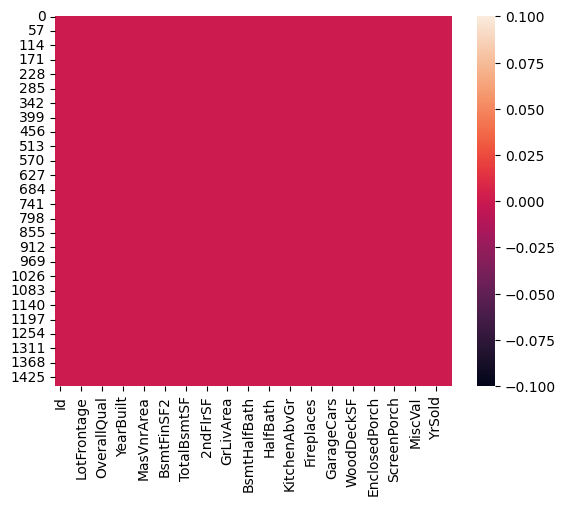

In [144]:
sns.heatmap(df_fill_median.isnull())

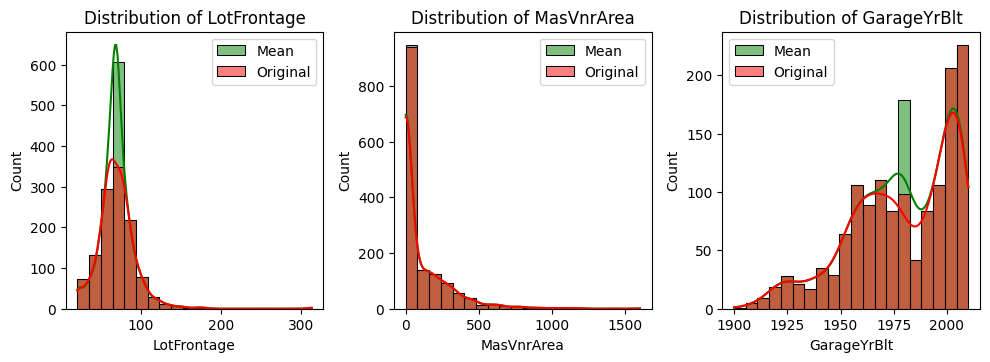

In [126]:
plt.figure(figsize=(10, 10))

# Loop through each column with null values
for i, col in enumerate(columns_with_null):
    plt.subplot(3, 3, i+1)  # Create subplot in a 3x3 grid

    sns.histplot(df_fill_median[col], color='green', bins=20, kde=True, label='Mean')  # Red distribution
    sns.histplot(drop_col[col], color='red', bins=20, kde=True, label='Original')  # Green distribution
    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()

#Combine Original data vs Mean vs Median

In [138]:
org_col = drop_col[columns_with_null].sample(10)
org_col

,LotFrontage,MasVnrArea,GarageYrBlt
17,72.0,0.0,1967.0
1064,NaN,200.0,1966.0
592,60.0,0.0,1985.0
1138,NaN,0.0,1977.0
1144,60.0,0.0,1941.0
1199,75.0,51.0,1974.0
1437,96.0,426.0,2008.0
1371,80.0,0.0,1955.0
1243,107.0,NaN,2006.0
712,40.0,0.0,1988.0


In [141]:
df_concat = pd.concat(
    [org_col, df_fill_mean[columns_with_null], df_fill_median[columns_with_null]],
    axis=1,
    keys=['Org_Data', 'Mean_Data', 'Median_Data']
)
df_concat.head(10)

Org_Data                          Mean_Data                          \
     LotFrontage MasVnrArea GarageYrBlt LotFrontage  MasVnrArea GarageYrBlt   
17          72.0        0.0      1967.0   72.000000    0.000000      1967.0   
1064         NaN      200.0      1966.0   70.049958  200.000000      1966.0   
592         60.0        0.0      1985.0   60.000000    0.000000      1985.0   
1138         NaN        0.0      1977.0   70.049958    0.000000      1977.0   
1144        60.0        0.0      1941.0   60.000000    0.000000      1941.0   
1199        75.0       51.0      1974.0   75.000000   51.000000      1974.0   
1437        96.0      426.0      2008.0   96.000000  426.000000      2008.0   
1371        80.0        0.0      1955.0   80.000000    0.000000      1955.0   
1243       107.0        NaN      2006.0  107.000000  103.685262      2006.0   
712         40.0        0.0      1988.0   40.000000    0.000000      1988.0   

     Median_Data                         
     LotFrontage MasVnrArea GarageYrBlt  
17          72.0        0.0      1967.0  
1064        69.0      200.0      1966.0  
592         60.0        0.0      1985.0  
1138        69.0        0.0      1977.0  
1144        60.0        0.0      1941.0  
1199        75.0       51.0      1974.0  
1437        96.0      426.0      2008.0  
1371        80.0        0.0      1955.0  
1243       107.0        0.0      2006.0  
712         40.0        0.0      1988.0

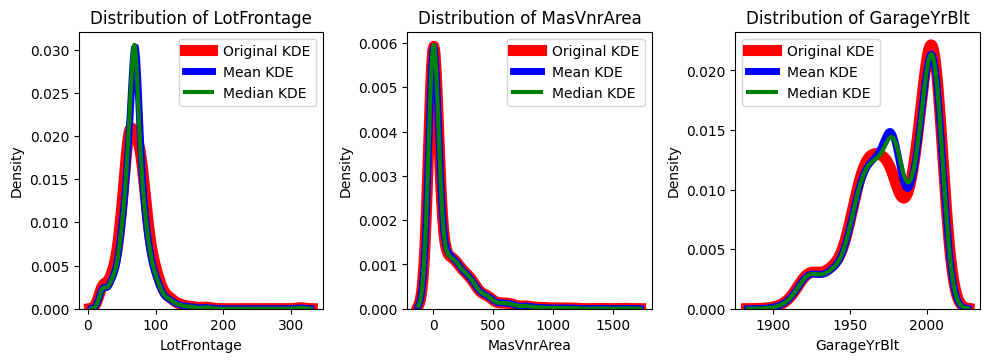

In [127]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(columns_with_null):
    plt.subplot(3, 3, i+1)

    # Overlay histograms
    # sns.histplot(df_fill_median[col], color='red', alpha=0.4, bins=20, label='Median')
    # sns.histplot(drop_col[col], color='blue', alpha=0.4, bins=20, label='Original')

    # Overlay KDE plots
    sns.kdeplot(drop_col[col], linewidth=8, color='red', label='Original KDE')

    sns.kdeplot(df_fill_mean[col], linewidth=5, color='blue', label='Mean KDE')
    sns.kdeplot(df_fill_median[col], linewidth=3, color='green', label='Median KDE')

    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()
